In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

## Correlation Matrix

In [98]:
df = pd.read_csv('/Users/tiaanstals/Desktop/UNI/ECOS3021/data/ECOS3021 Data_Clean.csv')
df.set_index('Quarter', inplace=True)

In [99]:
df.index = pd.to_datetime(df.index)
df = df.diff().dropna()

In [100]:
df['GDP.Millions.CV_Lag_1']=df['GDP.Millions.CV'].shift(-1)
df['GDP.Millions.CV_Lag_2']=df['GDP.Millions.CV'].shift(-2)
df['GDP.Millions.CV_Lag_3']=df['GDP.Millions.CV'].shift(-3)
df['GDP.Millions.CV_Lag_4']=df['GDP.Millions.CV'].shift(-4)
df['GDP.Millions.CV_Lag_5']=df['GDP.Millions.CV'].shift(-5)
df['GDP.Millions.CV_Lag_6']=df['GDP.Millions.CV'].shift(-6)
df['GDP.Millions.CV_Lag_7']=df['GDP.Millions.CV'].shift(-7)
df['GDP.Millions.CV_Lag_8']=df['GDP.Millions.CV'].shift(-8)

In [101]:
#get correlation matrix
corr = df.corr()

In [102]:
# to get into excel
corr.to_clipboard()
corr

,GDP.Millions.CV,Household_Expenditure.Millions,Government_Expenditure.Millions,Total_Investment.Millions,Net_Exports.Millions,Unemployment_Rate.Percent,Working_Age_Population.Thousands,Real_Net_Disposable_Income.CV.Millions,Household_Savings_Ratio,Household_Debt_To_Assets,...,ASX_20.Index,Export_Prices.Index,GDP.Millions.CV_Lag_1,GDP.Millions.CV_Lag_2,GDP.Millions.CV_Lag_3,GDP.Millions.CV_Lag_4,GDP.Millions.CV_Lag_5,GDP.Millions.CV_Lag_6,GDP.Millions.CV_Lag_7,GDP.Millions.CV_Lag_8
GDP.Millions.CV,1.000000,0.330079,-0.155518,0.279169,0.031125,0.001913,0.046036,0.290368,-0.194826,-0.132714,...,-0.090207,-0.184053,-0.105975,0.115950,-0.122240,-0.070546,-0.093059,-0.054713,-0.094944,-0.083534
Household_Expenditure.Millions,0.330079,1.000000,-0.043097,0.192058,-0.286742,-0.122452,-0.268032,-0.008061,-0.275577,-0.265401,...,0.239067,-0.312770,0.179918,0.290124,0.065998,0.069832,-0.093827,0.200168,-0.252364,0.059449
Government_Expenditure.Millions,-0.155518,-0.043097,1.000000,-0.225927,0.159930,-0.122836,0.011639,0.238790,0.138403,0.103337,...,-0.038760,0.191327,0.011554,0.331788,-0.117646,-0.049711,0.082403,0.042321,0.007659,-0.045009
Total_Investment.Millions,0.279169,0.192058,-0.225927,1.000000,-0.066063,-0.199032,0.081282,0.321231,0.081848,0.100596,...,0.087339,0.114747,0.118491,-0.002728,0.041739,-0.064408,-0.183541,-0.079149,-0.160566,0.091592
Net_Exports.Millions,0.031125,-0.286742,0.159930,-0.066063,1.000000,0.124761,0.240891,0.665964,0.162311,0.247155,...,-0.091039,0.737763,-0.149817,0.000776,-0.076064,0.042353,0.209006,0.171801,0.067992,-0.126521
Unemployment_Rate.Percent,0.001913,-0.122452,-0.122836,-0.199032,0.124761,1.000000,0.215804,-0.150804,-0.034121,0.024353,...,-0.024320,-0.115256,-0.099050,-0.147588,-0.056153,-0.144855,0.002858,0.055848,-0.223119,-0.101924
Working_Age_Population.Thousands,0.046036,-0.268032,0.011639,0.081282,0.240891,0.215804,1.000000,0.127439,0.094743,0.137955,...,-0.155401,0.142896,-0.224966,-0.064138,-0.301383,-0.040198,-0.197396,-0.010221,-0.216849,-0.049095
Real_Net_Disposable_Income.CV.Millions,0.290368,-0.008061,0.238790,0.321231,0.665964,-0.150804,0.127439,1.000000,-0.043158,0.246758,...,0.036736,0.614345,-0.093120,0.167196,-0.102649,-0.015983,0.208228,0.074234,0.018227,-0.145934
Household_Savings_Ratio,-0.194826,-0.275577,0.138403,0.081848,0.162311,-0.034121,0.094743,-0.043158,1.000000,0.346233,...,-0.221563,0.316769,-0.045064,-0.009672,-0.017384,-0.044062,-0.035030,0.050560,-0.203467,0.127829
Household_Debt_To_Assets,-0.132714,-0.265401,0.103337,0.100596,0.247155,0.024353,0.137955,0.246758,0.346233,1.000000,...,-0.613763,0.491871,0.151179,-0.016724,-0.116764,-0.047296,0.058595,-0.206260,-0.030324,-0.195987


## Estimating GDP
1. Firstly we load the data in again, and we ensure that the data is a difference so that the series is stationary

In [65]:
df = pd.read_csv('/Users/tiaanstals/Desktop/UNI/ECOS3021/data/ECOS3021 Data_Clean.csv')
df.index = pd.to_datetime(df['Quarter'], dayfirst=True)
df.set_index('Quarter', inplace=True)
df_model = df.diff().dropna()

Now we fit the model to a vector autoregression model. The model.fit(lag) tells the model how many periods of previous data to use

In [66]:
mod = VAR(df_model)
result = mod.fit(1)

/Users/tiaanstals/.pyenv/versions/3.6.5/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [67]:
#take date for the last 4 quarters as input
forecast_input = df_model.values[-4:]
# create a prediction for ALL the variables for the next 8 quarters, including a 95% confidence interval
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.forecast_interval.html
forecast = result.forecast_interval(y=forecast_input, steps=8)

# to select the mean valaue of the forecast 
for mean_forecasts in forecast[0]:
    # for each quarter, print predicted GDP change
    print(mean_forecasts[0])

3893.163006030467
2213.051840088523
3016.284316135893
2768.722675453521
2903.4304756247475
2722.5230053030514
2928.419796493107
2680.5990994898816


In [74]:
# construct the dataseries for a few key components
# align predicted changes with dates
df_forecast = pd.DataFrame(forecast[0], index=df.index[-8:], columns=df.columns)      
df_actual = pd.DataFrame(df_model.values,index=df.index[1:-8], columns=df.columns)
final_df = df_actual.append(df_forecast)
final_df[-8:]

,GDP.Millions.CV,Household_Expenditure.Millions,Government_Expenditure.Millions,Total_Investment.Millions,Net_Exports.Millions,Unemployment_Rate.Percent,Working_Age_Population.Thousands,Real_Net_Disposable_Income.CV.Millions,Household_Savings_Ratio,Household_Debt_To_Assets,...,5Y_Yield.Percent,10Y_Yield.Percent,JPY.FX,USD.FX,CNY.FX,TWI.Index,House_Prices.Index,ASX_200.Index,ASX_20.Index,Export_Prices.Index
Quarter,,,,,,,,,,,,,,,,,,,,,
1/3/20,3893.163006,2221.272473,834.970854,2856.939527,1052.726963,0.145451,78.880172,3503.194655,1.042998,0.140432,...,0.243383,0.379275,0.830974,-0.017641,-0.207086,-0.922245,4.510416,-532.613673,-118.574650,-0.156885
1/6/20,2213.051840,560.157898,-118.091509,251.677432,-1096.286905,-0.024189,91.636384,773.553896,0.194021,0.316659,...,-0.101120,-0.017468,-2.552244,-0.019601,-0.227659,-1.244555,0.820243,-148.986725,-155.056743,2.540349
1/9/20,3016.284316,1432.670011,418.431976,582.794209,-88.449330,0.028422,73.628736,2532.650165,0.350111,0.329734,...,-0.069928,-0.049594,-3.370492,-0.029447,-0.264090,-1.978475,0.883886,-267.982107,-97.799916,2.320748
1/12/20,2768.722675,1654.822062,551.540898,334.969817,392.834856,0.091216,87.493235,925.806157,0.607117,0.136517,...,-0.381465,-0.288917,-1.527957,-0.023467,-0.209188,-1.247184,-0.092679,-25.598260,-69.821203,1.511503
1/3/21,2903.430476,1582.243480,602.538240,-252.908322,-219.985813,0.052917,79.884885,1565.344533,-0.309968,-0.005678,...,-0.024776,-0.048832,1.023026,-0.000399,-0.010844,0.131141,0.857050,94.317897,49.024799,-1.447632
1/6/21,2722.523005,1737.752279,603.108224,705.092347,-250.937382,0.034925,79.099690,855.541605,-0.075251,-0.102616,...,-0.125285,-0.124929,-0.282676,-0.001695,-0.000670,-0.134298,1.392538,98.338982,51.010660,-1.068897
1/9/21,2928.419796,1544.829877,630.181081,284.102474,-278.641503,-0.011332,79.150071,1698.522928,-0.210791,-0.126010,...,-0.014369,-0.022865,0.961724,0.009774,0.061429,0.620402,1.735627,101.219264,41.865267,-1.459111
1/12/21,2680.599099,1633.416180,631.852949,591.912971,363.568208,-0.009263,79.252993,2451.402090,-0.025218,-0.080687,...,0.000046,-0.016673,0.884305,0.005483,0.024342,0.372874,1.790953,72.643344,52.528975,-0.016506


In [90]:
sum_df = final_df.cumsum() + df.values[0]
sum_df.to_clipboard()

In [113]:
# see changes as annualised figures
pct_df = 4*(sum_df.pct_change().dropna()) * 100
pct_df[-12:]

,GDP.Millions.CV,Household_Expenditure.Millions,Government_Expenditure.Millions,Total_Investment.Millions,Net_Exports.Millions,Unemployment_Rate.Percent,Working_Age_Population.Thousands,Real_Net_Disposable_Income.CV.Millions,Household_Savings_Ratio,Household_Debt_To_Assets,...,5Y_Yield.Percent,10Y_Yield.Percent,JPY.FX,USD.FX,CNY.FX,TWI.Index,House_Prices.Index,ASX_200.Index,ASX_20.Index,Export_Prices.Index
Quarter,,,,,,,,,,,,,,,,,,,,,
1/3/19,1.614518,1.443759,3.576699,-2.445815,208.438379,3.180915,2.104119,5.345397,66.666667,0.358300,...,-135.474453,-119.649562,-7.182550,0.782888,-12.381561,-6.670253,-12.000000,32.886254,16.179267,17.990431
1/6/19,2.592985,1.463727,10.742557,-3.460809,99.637011,11.045365,1.204508,7.668112,-102.857143,-6.522394,...,-15.011038,-9.285714,-12.550146,-9.915818,-1.970826,-4.814004,-2.945508,18.170622,19.364805,15.018315
1/9/19,2.760130,0.039814,3.439716,3.612626,84.592609,-0.767754,1.806299,3.796175,338.461538,-9.910437,...,-144.954128,-133.820841,-18.031215,-11.579550,0.488172,-6.644518,9.792285,11.914841,19.491641,5.295675
1/12/19,1.538247,1.355033,5.233971,-2.793336,-110.794297,-3.076923,1.496643,-2.227365,-100.000000,-5.385324,...,-50.359712,-47.252747,11.997809,6.836599,4.797760,3.828829,15.640840,6.026829,-2.135104,-20.905923
1/3/20,3.133248,3.264129,3.423625,10.198620,26.359361,11.275263,1.521938,3.513921,115.888631,2.947017,...,120.188919,141.785059,4.419878,-10.222141,-17.104060,-6.172302,12.572587,-31.317896,-12.801063,-0.576785
1/6/20,1.767239,0.816482,-0.480101,0.876093,-25.752983,-1.823704,1.761358,0.769165,16.715173,6.596621,...,-38.398218,-4.821240,-13.426803,-11.655631,-19.643254,-8.459971,2.216716,-9.504642,-17.293014,9.353005
1/9/20,2.398067,2.083994,1.703178,2.024283,-2.220749,2.152645,1.409026,2.513449,28.952626,6.757544,...,-29.373602,-13.854996,-18.347289,-18.036397,-23.963439,-13.739444,2.375549,-17.512095,-11.400191,8.349256
1/12/20,2.188128,2.394665,2.235464,1.157629,9.918199,6.871684,1.668472,0.913050,46.817203,2.751298,...,-172.934715,-83.609974,-8.717291,-15.052220,-20.191221,-8.969093,-0.247615,-1.749384,-8.377576,5.326685
1/3/21,2.282104,2.276012,2.428590,-0.871509,-5.419763,3.919128,1.517055,1.540261,-21.398342,-0.113655,...,-19.786381,-17.865900,5.966589,-0.266106,-1.102337,0.964730,2.291242,6.473993,6.008130,-5.034553


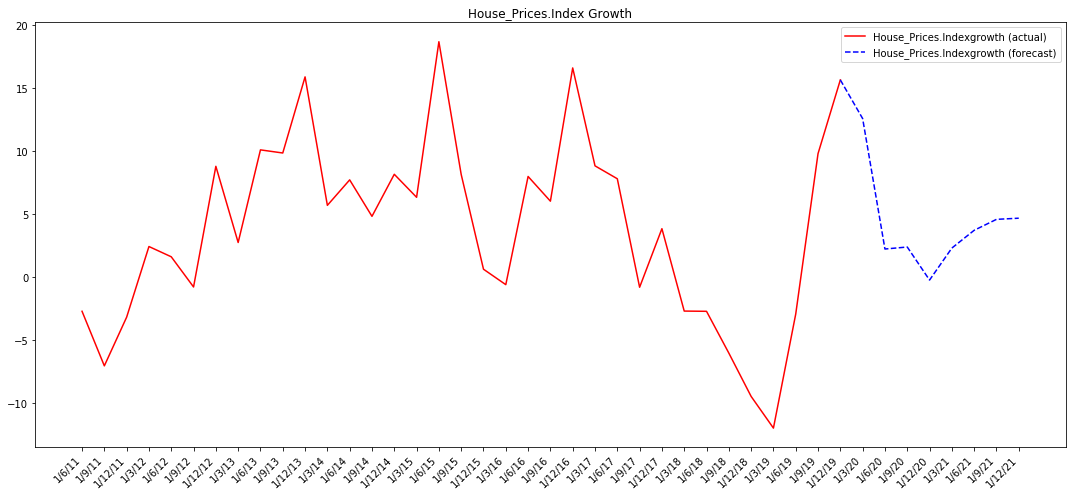

In [130]:
fig, axs = plt.subplots(figsize=(15,7))
column = 'House_Prices.Index'
start = 20
x = pct_df.index[start:-8]
x_forecast = pct_df.index[-9:]
gdp = pct_df[column].values[start:-8]
gdp_forecast = pct_df[column].values[-9:]
axs.plot(x, gdp, 'r', label=column + 'growth (actual)')
fig.autofmt_xdate(rotation=45)
axs.plot(x_forecast, gdp_forecast, 'b--', label = column + 'growth (forecast)')
plt.title(column + ' Growth')
plt.legend()
fig.tight_layout()